# CodeClause Internship
## Loan Prediction
### Author: Gowri S
#### This is a machine learning classifier problem aimed at predicting the whether load will be sanctioned or not based on certain variable features.In this execise we will be using the python code to predict the loan status using the machine learning classification technique .I will be describing the process in different steps.

### 1. Importing Necessary Libraries

Here we will be importing the necessary libraries for data analysis and data cleaning and for importing the dataset in dataframe format.This includes the padas, numpy and visualization libraries like matplotlib and seaborn.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


### 2. Loading the Data

Next step is to import the dataset we are going to analyse to Dataframe format.

In [2]:
loan_df1=pd.read_csv(r"D:\datas\codeclause\loan_prediction_3\training_set.csv")
loan_df1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


### 3. Data analysis and Cleaning

This is the next basic nature of the data.We will be looking the feature variables,target variables.Further we will be looking data set in details for the shape,data types ,presence of null values and distribution of data points using describe option.It will give mean,standard deviation ,percentile distribution,total count of data

In [3]:
loan_df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
loan_df1.shape

(614, 13)

In [5]:
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
loan_df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_df1.isnull().sum()# evaluating the null values within the dataset

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_df2=loan_df1.dropna()

In [9]:
loan_df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_df2.shape

(476, 13)

In [11]:
loan_df2=loan_df2.drop(['Loan_ID'],axis='columns')
loan_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N


In [12]:
loan_df2['property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [13]:
loan_df2['Dependents'].unique()

array(['0', '3+', '1', '2'], dtype=object)

In [14]:
loan_df2['Credit_History'].unique()

array([1., 0.])

In [15]:
loan_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,N


In [16]:
from sklearn.preprocessing import LabelEncoder
le_Gender=LabelEncoder()
le_Married=LabelEncoder()
le_Dependents=LabelEncoder()
le_Education=LabelEncoder()
le_Self_Employed=LabelEncoder()
le_Credit_History=LabelEncoder()
le_property_Area=LabelEncoder()
le_Loan_Status=LabelEncoder()
loan_df2['Gender']=le_Gender.fit_transform(loan_df2['Gender'])
loan_df2['Married']=le_Married.fit_transform(loan_df2['Married'])
loan_df2['Dependents']=le_Dependents.fit_transform(loan_df2['Dependents'])
loan_df2['Education']=le_Education.fit_transform(loan_df2['Education'])
loan_df2['Self_Employed']=le_Self_Employed.fit_transform(loan_df2['Self_Employed'])
loan_df2['Credit_History']=le_Credit_History.fit_transform(loan_df2['Credit_History'])
loan_df2['property_Area']=le_property_Area.fit_transform(loan_df2['property_Area'])
loan_df2['Loan_Status']=le_Loan_Status.fit_transform(loan_df2['Loan_Status'])

In [17]:
loan_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1,2,1
6,1,1,0,1,0,2333.0,1516.0,95.0,360.0,1,2,1
7,1,1,3,0,0,3036.0,2504.0,158.0,360.0,0,1,0


### 4. Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

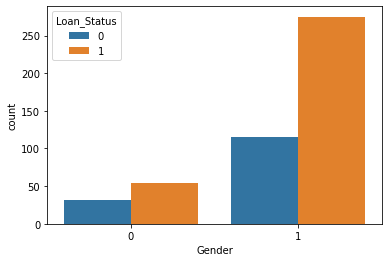

In [18]:
sn.countplot(x='Gender',hue='Loan_Status',data=loan_df2)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

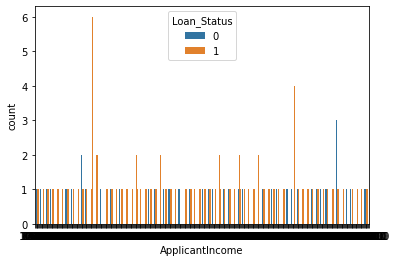

In [19]:
sn.countplot(x='ApplicantIncome',hue='Loan_Status',data=loan_df2)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

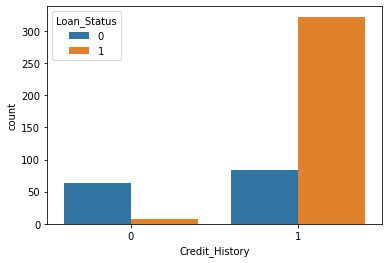

In [20]:
sn.countplot(x='Credit_History',hue='Loan_Status',data=loan_df2)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

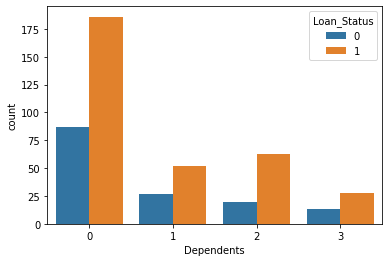

In [21]:
sn.countplot(x='Dependents',hue='Loan_Status',data=loan_df2)

<AxesSubplot:xlabel='property_Area', ylabel='count'>

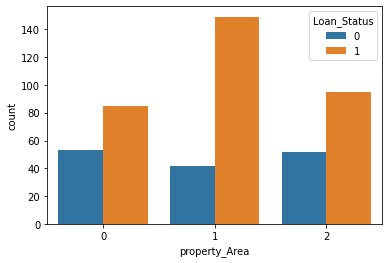

In [22]:
sn.countplot(x='property_Area',hue='Loan_Status',data=loan_df2)

In [23]:
loan_df2.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
Loan_Status,,,,,,,,,,,
0,0.782313,0.564626,0.721088,0.244898,0.156463,5737.993197,1774.884354,153.551020,342.693878,0.571429,0.993197
1,0.835866,0.683891,0.796353,0.185410,0.127660,5204.832827,1491.753556,140.465046,341.544073,0.978723,1.030395


In [24]:
loan_df2.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
Gender,1.000000,0.350174,0.216681,0.061342,-0.004076,0.033111,0.156196,0.097990,-0.089897,0.020859,-0.002640,0.064307
Married,0.350174,1.000000,0.382974,0.002568,0.012050,0.037216,0.100286,0.181413,-0.108426,0.028476,0.040784,0.115302
Dependents,0.216681,0.382974,1.000000,0.030714,0.040465,0.132161,-0.003733,0.169013,-0.097824,-0.028386,-0.002550,0.034082
Education,0.061342,0.002568,0.030714,1.000000,-0.003733,-0.131791,-0.074317,-0.171977,-0.101142,-0.055007,-0.052819,-0.068230
Self_Employed,-0.004076,0.012050,0.040465,-0.003733,1.000000,0.171590,-0.007334,0.113407,-0.035873,-0.024896,-0.057176,-0.038754
ApplicantIncome,0.033111,0.037216,0.132161,-0.131791,0.171590,1.000000,-0.112888,0.496669,-0.010587,-0.055814,-0.053103,-0.043324
CoapplicantIncome,0.156196,0.100286,-0.003733,-0.074317,-0.007334,-0.112888,1.000000,0.188020,-0.005986,-0.009012,0.005522,-0.049885
LoanAmount,0.097990,0.181413,0.169013,-0.171977,0.113407,0.496669,0.188020,1.000000,0.050229,-0.042090,-0.115462,-0.075056
Loan_Amount_Term,-0.089897,-0.108426,-0.097824,-0.101142,-0.035873,-0.010587,-0.005986,0.050229,1.000000,0.032014,-0.060511,-0.008123
Credit_History,0.020859,0.028476,-0.028386,-0.055007,-0.024896,-0.055814,-0.009012,-0.042090,0.032014,1.000000,-0.005187,0.531317


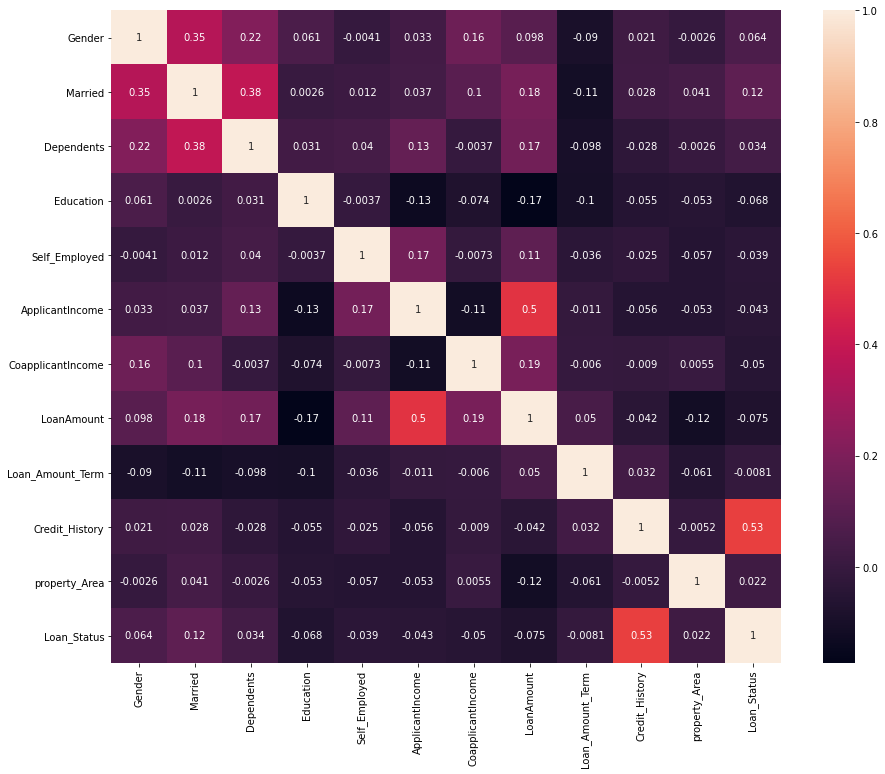

In [25]:
plt.figure(figsize=(15,12))
sn.heatmap(loan_df2.corr(),annot=True)
plt.show()

In [26]:
x=loan_df2.drop("Loan_Status",axis='columns')
y=loan_df2[['Loan_Status']]

### 5. Train Test split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.2)

 ### 6. Modeling

In this module I will be building different classifier models and is fitting them appropriately with training data set.After building the model ,I will be predicting the output feature for the given test data.and also predict the score of model and compare which model is more appropriate.I will be introducing
   #### Decision tree classifier
   #### Randonforest Classifier
   #### Gaussian Naive Bayes Classifier
   #### Logistic Regression

In [29]:
# a. Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

loan_model_dtc=DecisionTreeClassifier()

loan_model_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_predicted=loan_model_dtc.predict(x_test)

y_predicted

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [32]:
loan_model_dtc.score(x_test,y_predicted)

1.0

In [33]:
loan_model_dtc.score(x_test,y_test)

0.6666666666666666

In [34]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)

cm

array([[ 74,  41],
       [ 86, 180]], dtype=int64)

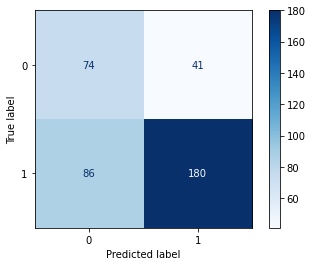

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(loan_model_dtc,x_test,y_test,cmap=plt.cm.Blues)

In [36]:
#b. Randonforest Classifier

from sklearn.ensemble import RandomForestClassifier

loan_model_forest=RandomForestClassifier(n_estimators=10)

In [37]:
loan_model_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [38]:
loan_model_forest.score(x_train,y_train)

0.9789473684210527

In [39]:
loan_model_forest.score(x_test,y_test)

0.6797900262467191

In [40]:
y_predicted_forest=loan_model_forest.predict(x_test)

y_predicted_forest

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [41]:
loan_model_forest.score(x_test,y_predicted_forest)

1.0

In [42]:
from sklearn.metrics import confusion_matrix

cm_forest=confusion_matrix(y_test,y_predicted_forest)

cm_forest

array([[ 59,  56],
       [ 66, 200]], dtype=int64)

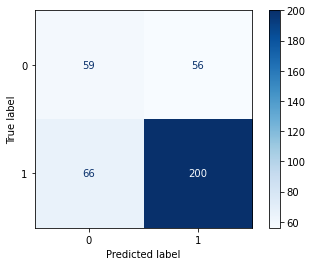

In [43]:
plot_confusion_matrix(loan_model_forest,x_test,y_test,cmap=plt.cm.Blues)

In [44]:
#c. Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

loan_model_NB=GaussianNB()

In [45]:
loan_model_NB.fit(x_train,y_train)

GaussianNB()

In [46]:
y_predicted_NB=loan_model_NB.predict(x_test)

loan_model_NB.score(x_test,y_predicted_NB)

1.0

In [47]:
loan_model_NB.score(x_test,y_test)

0.7742782152230971

In [48]:
from sklearn.metrics import confusion_matrix

cm_NB=confusion_matrix(y_test,y_predicted_NB)

cm_NB

array([[ 63,  52],
       [ 34, 232]], dtype=int64)

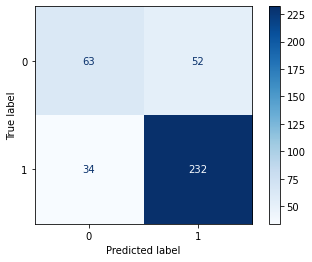

In [49]:
plot_confusion_matrix(loan_model_NB,x_test,y_test,cmap=plt.cm.Blues)

In [50]:
#d. Logistic Regression

from sklearn.linear_model import LogisticRegression

loan_model_l=LogisticRegression()

In [51]:
loan_model_l.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_predicted_l=loan_model_l.predict(x_test)

loan_model_l.score(x_test,y_predicted_l)

1.0

In [53]:
loan_model_l.score(x_test,y_test)

0.7637795275590551

In [54]:
from sklearn.metrics import confusion_matrix

cm_l=confusion_matrix(y_test,y_predicted_l)

cm_l

array([[ 59,  56],
       [ 34, 232]], dtype=int64)

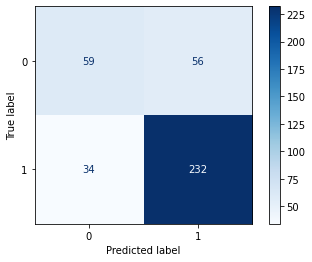

In [55]:
plot_confusion_matrix(loan_model_l,x_test,y_test,cmap=plt.cm.Blues)

From these modelling and analysis of each model Gaussian Naive Bayes Classifier model is evaluated to be the most efficient one

In [56]:
loan_test=pd.read_csv(r"D:\datas\codeclause\loan_prediction_3\testing_set.csv")
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [57]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

In [58]:
loan_test=loan_test.dropna()

In [59]:
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [60]:
loan_test=loan_test.drop(['Loan_ID'],axis='columns')
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [61]:
le_Gender1=LabelEncoder()
le_Married1=LabelEncoder()
le_Dependents1=LabelEncoder()
le_Education1=LabelEncoder()
le_Self_Employed1=LabelEncoder()
le_Credit_History1=LabelEncoder()
le_property_Area1=LabelEncoder()

loan_test['Gender']=le_Gender1.fit_transform(loan_test['Gender'])
loan_test['Married']=le_Married1.fit_transform(loan_test['Married'])
loan_test['Dependents']=le_Dependents1.fit_transform(loan_test['Dependents'])
loan_test['Education']=le_Education1.fit_transform(loan_test['Education'])
loan_test['Self_Employed']=le_Self_Employed1.fit_transform(loan_test['Self_Employed'])
loan_test['Credit_History']=le_Credit_History1.fit_transform(loan_test['Credit_History'])
loan_test['property_Area']=le_property_Area1.fit_transform(loan_test['property_Area'])


In [62]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
4,1,0,0,1,0,3276,0,78.0,360.0,1,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1,2


In [63]:
loan_test['Loan_Status_predicted']=loan_model_forest.predict(loan_test)
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status_predicted
0,1,1,0,0,0,5720,0,110.0,360.0,1,2,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2,0
4,1,0,0,1,0,3276,0,78.0,360.0,1,2,1
5,1,1,0,1,1,2165,3422,152.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,0,0,2269,2167,99.0,360.0,1,1,1
362,1,1,3,1,1,4009,1777,113.0,360.0,1,2,1
363,1,1,0,0,0,4158,709,115.0,360.0,1,2,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1,0,1


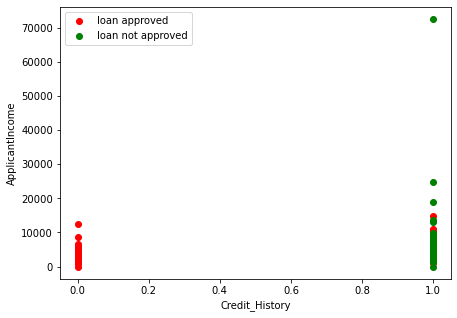

In [64]:
fig=plt.figure(figsize=(7,5))

df1=loan_test[loan_test.Loan_Status_predicted==0]
df2=loan_test[loan_test.Loan_Status_predicted==1]

plt.scatter(df1['Credit_History'],df1['ApplicantIncome'],color='r',label='loan approved')
plt.scatter(df2['Credit_History'],df2['ApplicantIncome'],color='g',label='loan not approved')

plt.xlabel('Credit_History')
plt.ylabel('ApplicantIncome')

plt.legend()
plt.show()

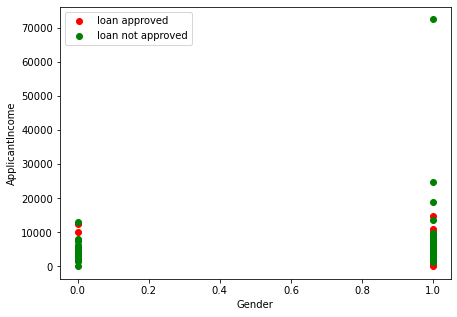

In [65]:
fig=plt.figure(figsize=(7,5))

df1=loan_test[loan_test.Loan_Status_predicted==0]
df2=loan_test[loan_test.Loan_Status_predicted==1]

plt.scatter(df1['Gender'],df1['ApplicantIncome'],color='r',label='loan approved')
plt.scatter(df2['Gender'],df2['ApplicantIncome'],color='g',label='loan not approved')

plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')

plt.legend()
plt.show()